# Identifying Natural Classes from Spectrograms

In this notebook, you will:
- review how to read a spectrogram
- review three natural classes: nasals, stops, and fricatives
- learn how to identify natural classes from spectrograms

Reminder: To run a block of code, press Ctrl+Enter

In [4]:
# install a library that is not already included in the notebooks.ai environment
!pip install praat-parselmouth

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np
import parselmouth
import IPython.display as ipd
from glob import glob

## Spectrograms

The following cell of code defines a function that will draw spectrograms.

Recall that a spectrogram is a visualization of a sound where:
- time is plotted on the x-axis, 
- frequency in Hertz is plotted on the y-axis, and 
- intensity (loudness) is plotted as darkness. 

In this notebook, we will see that different sounds can be identified by patterns in their spectrograms.

In [7]:
def draw_spectrogram(sound, figure_size=(15,7), dynamic_range=70, maximum_frequency=8000):
    spectrogram = sound.to_spectrogram(maximum_frequency)
    plt.figure(figsize=figure_size)
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='gray_r')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")
    plt.show()

All the files in this notebook have the same format. They are spoken by the same speaker and are designed to demonstrate what different consonants sound like. In each file, the speaker says the consonant twice: first, the consonant followed by the vowel /a/, and second, the consonant in between two /a/ vowels.

Run the following block of code and look at the spectrogram. This is the spectrogram of a speaker saying /ba aba/. The three dark columns with darker horizontal bands from .2-.75s, 1.0-1.2s, and 1.35-1.9s are the three /a/ vowels. Vowels will always have these horizontal bands, called formants. The first example of the consonant is before the first vowel, and the second example of the consonant is between the second and third vowels. For all the activities in this notebook, we will be focusing on properties of the consonants in the spectrograms.

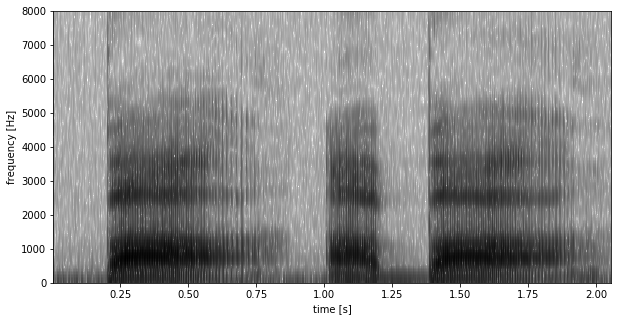

Voiced_bilabial_plosive


In [27]:
# read a sound file into memory and assign it the variable snd
snd = parselmouth.Sound('plosives/Voiced_bilabial_plosive.wav')

# use the function defined in the previous block of code to create a spectrogram from snd
draw_spectrogram(snd, (10,5), dynamic_range=120)

print('Voiced_bilabial_plosive')

# display an audio player for the file 'Voiced_bilabial_plosive.wav'
ipd.display(ipd.Audio('plosives/Voiced_bilabial_plosive.wav'))

## Identifying Nasals

Nasals are sounds made with the velum (soft palate) lowered. When the velum is lowered, air can pass through both the oral cavity and the nasal cavity on its way out of the lungs. When the mouth is closed, but the velum is lowered, air can't pass out the mouth, but it can pass through the nasal cavity and still create a sound. Practice saying /m/, and pay attention to what it feels like. You may be able to feel the vibration in your nasal cavity. The resonance of air vibrating in the nasal cavity gives nasals a characteristic sound and appearance in a spectrogram.

Run the block of code below and take a look at the spectrograms. First, identify the three /a/ vowels: three dark columns with formants running through them. This is a little trickier than our first example because nasals have formants too! However, because consonants are created with more constriction in the oral tract than vowels, they are quieter, so the nasal consonants are usually a little bit lighter than the vowels. In particular, nasal consonants have less energy (are lighter) in the higher frequencies compared to vowels.

For each spectrogram, write down the approximate time intervals that contain each nasal consonant. Remember there are two nasals per spectrogram.

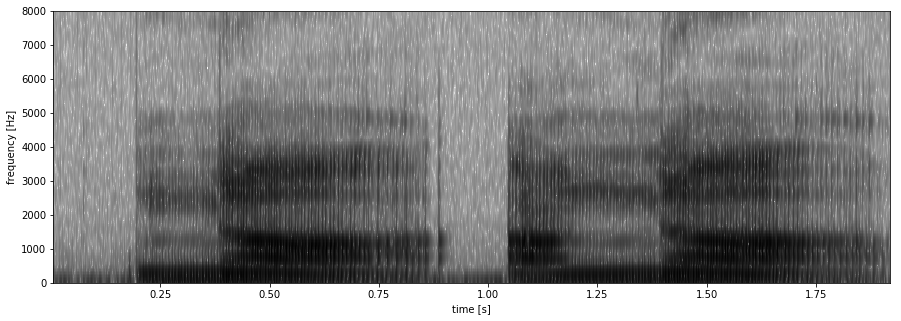

Velar_nasal


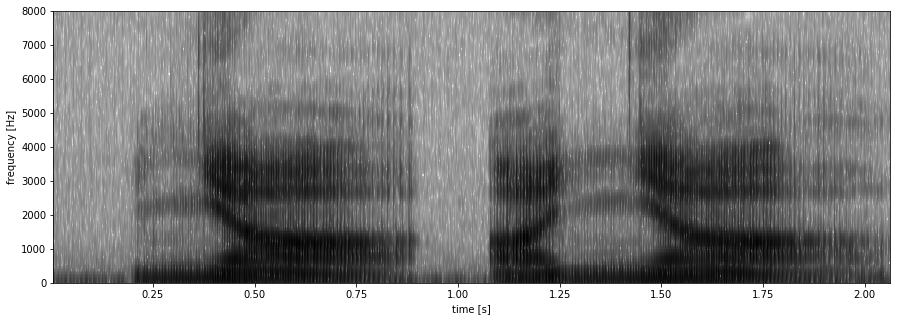

Palatal_nasal


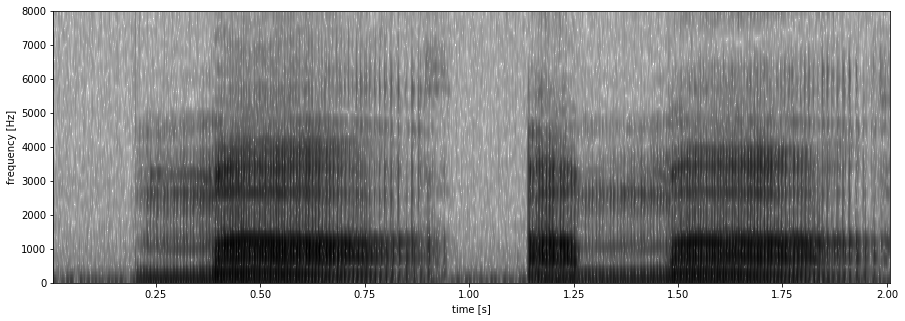

Bilabial_nasal


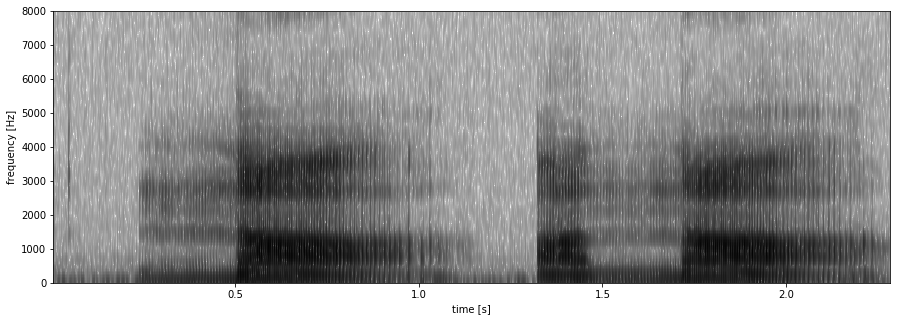

Alveolar_nasal


In [22]:
for filename in glob('nasals/*.wav'):
    snd = parselmouth.Sound(filename)
    draw_spectrogram(snd, (15,5), dynamic_range=120)
    print(filename[7:-4])
    ipd.display(ipd.Audio(filename))

### Nasals Review:
Write down two visual properties of nasal consonants.

## Identifying Stops

Stops, also known as plosives, are made with complete obstruction of the oral tract. This means that when you make a stop, no sound can come out of your mouth until you release the stop. The sounds /p/, /t/, and /k/ are common stops. Try to say each of these sounds by itself. You'll find that you don't make any noise until you move open your lips for /p/, remove your tongue from your alveolum for /t/, or remove your tongue from your velum for /k/.

Run the block of code below and take a look at the spectrograms. First, identify the three /a/ vowels: three dark columns with formants running through them. Next, identify the two consonants. Stops are basically silent, so at the beginning of a word, you can't tell when they begin, and at the end of a word, you can't always tell when they end.

For each spectrogram, write down the approximate end time of the first stop and the approximate beginning and end time of the second stop.

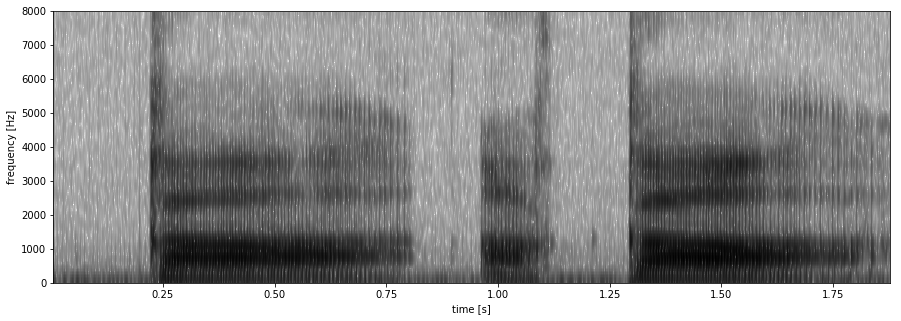

Voiceless_uvular_plosive


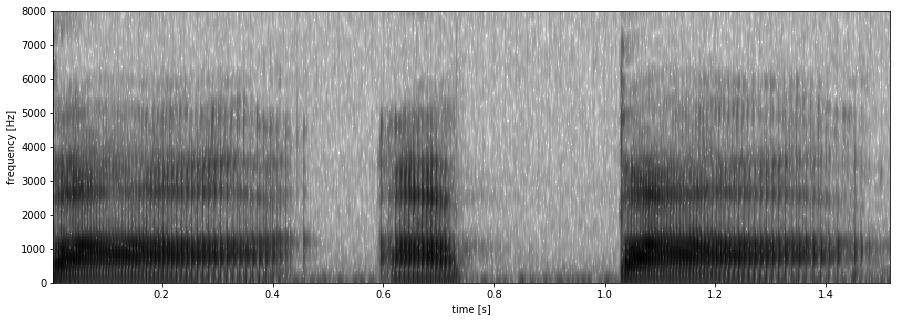

Voiceless_bilabial_plosive


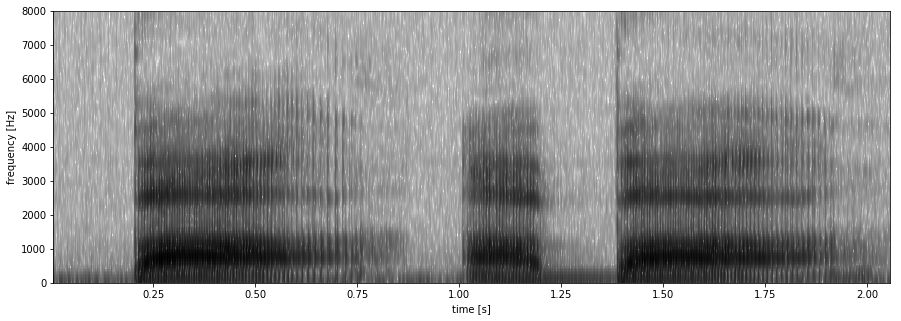

Voiced_bilabial_plosive


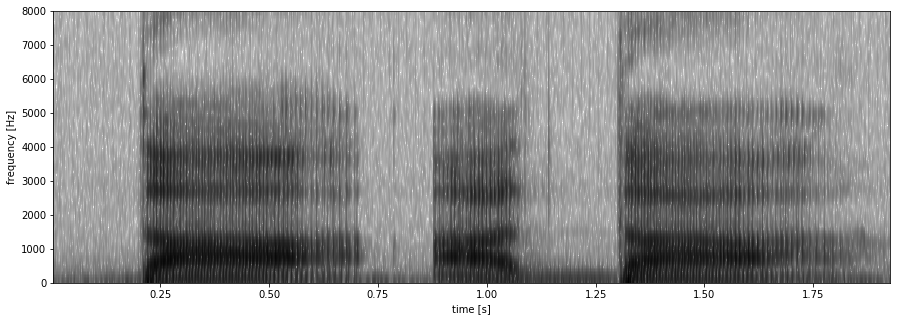

Voiced_alveolar_plosive


In [21]:
for filename in glob('plosives/*.wav'):
    snd = parselmouth.Sound(filename)
    draw_spectrogram(snd, (15,5), dynamic_range=120)
    print(filename[9:-4])
    ipd.display(ipd.Audio(filename))

### Stops Review:
Why didn't we write down a time for the approximate beginning of the first stop for each of these spectrograms?

## Identifying Fricatives

Fricatives are made with nearly complete obstruction of the oral tract. This means that when air passes through narrowed oral tract, it is very turbulent and noisy. This turbulent airflow is called frication. Try saying /z/ and gradually move your tongue to the roof of your mouth. It should sound like /zt/. Next try saying /z/ and gradually open your mouth wider. It should sound like /za/. The frication created by nearly (but not quite!) complete obstruction of the oral tract gives fricatives their characteristic sound and appearance.

Run the block of code below and take a look at the spectrograms. First, identify the three /a/ vowels: three dark columns with formants running through them. Next, identify the two fricatives. We identify fricatives by the frication they produce, which looks like broadband noise. In a spectrogram, broadband noise looks like uniform patches of darkness. For example, in all of the spectrograms, even when the recording is 'silent', the spectrogram is still light gray and not white. These uniform patches of light gray are low level background noise. Fricative consonants look like noise that is louder than the background noise. Sometimes you can see faint formants in the noise, but they should be much fainter than the formants you see in vowels.

For each spectrogram, write down the approximate beginning and end time of each fricative. Remember there are two fricatives per spectrogram.

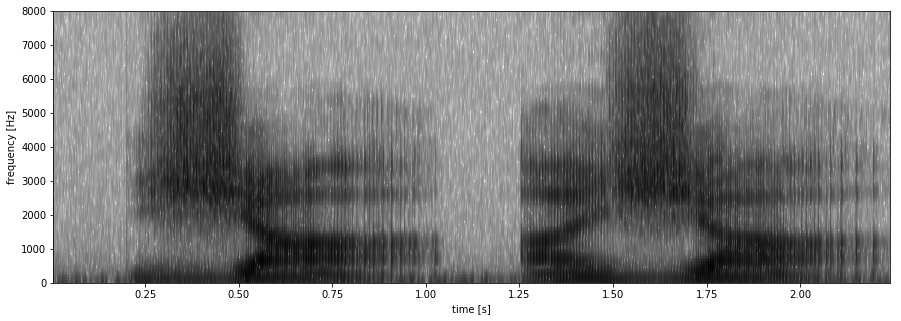

Voiced_palato-alveolar_sibilant


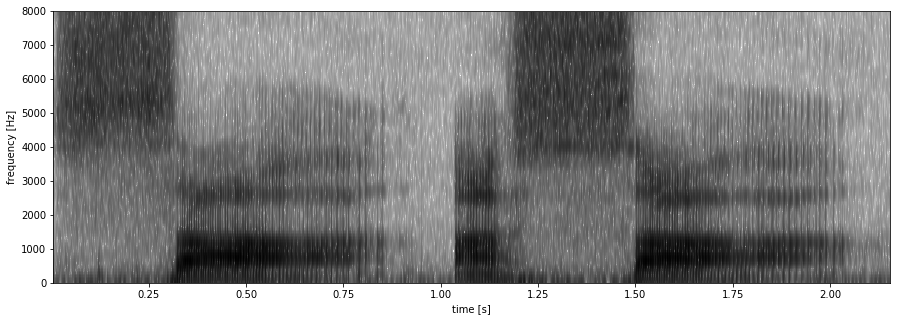

Voiceless_alveolar_sibilant


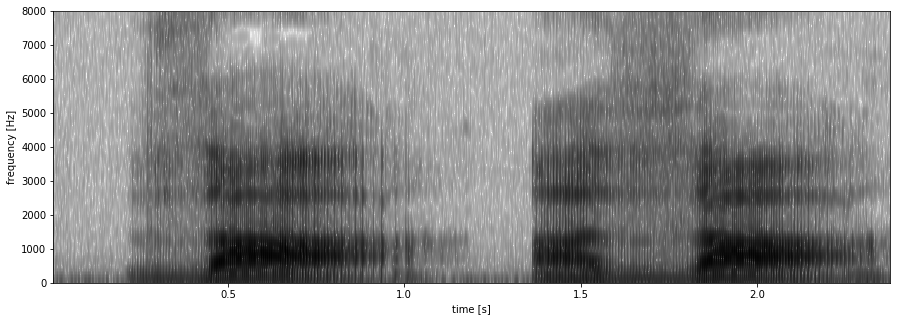

Voiced_dental_fricative


In [28]:
for filename in glob('fricatives/*.wav'):
    snd = parselmouth.Sound(filename)
    draw_spectrogram(snd, (15,5), dynamic_range=120)
    print(filename[11:-4])
    ipd.display(ipd.Audio(filename))

### Fricatives Review:
A sibilant is a specific kind of fricative. The fricatives in the first two spectrograms are sibilants and the third spectrogram is not. Based on these examples, what do you think the visual difference is between sibilants and non-sibilant fricatives?

## Practice
For each of the following spectrograms, identify whether the consonants it contains are nasals, stops, or fricatives.

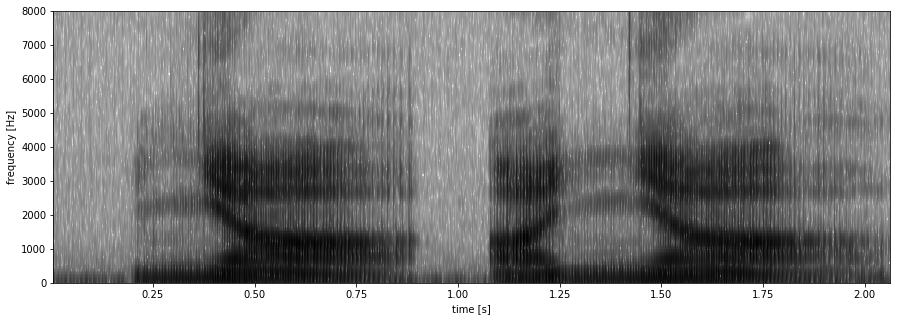

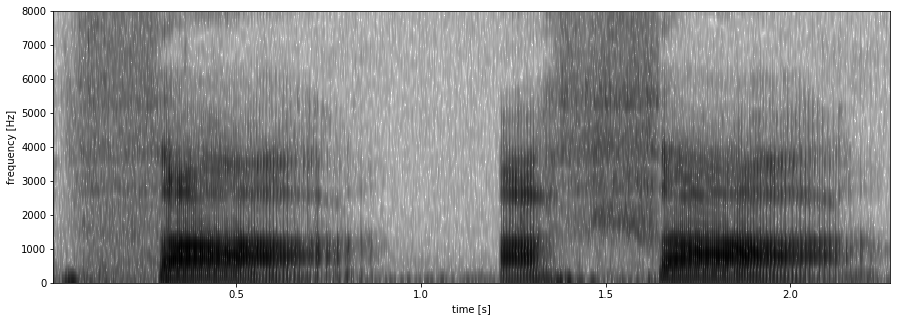

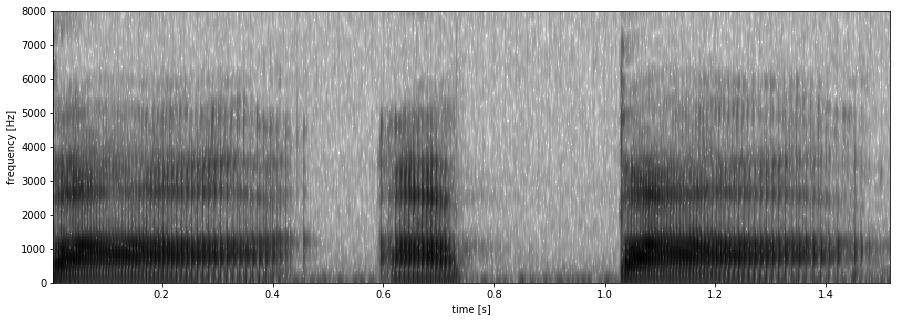

In [26]:
for filename in glob('practice/*.wav'):
    snd = parselmouth.Sound(filename)
    draw_spectrogram(snd, (15,5), dynamic_range=120)